In [239]:
# Author: Evgenii Zorin
# Data source: modified from https://www.kaggle.com/alizahidraja/world-population-by-age-group-2020

First, let's process the data:

In [240]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv('WorldPopulationByAge2020_proc.csv')
df['PopTotal'] = df['PopTotal'] * 1000
df['PopTotalMln'] = df['PopTotal'] / 1000000
df


,Location,AgeGrp,PopMale,PopFemale,PopTotal,PopTotalMln
0,Afghanistan,0-19,10709.0,10197.0,20906000.0,20.906
1,Afghanistan,20-39,5994.0,5574.0,11568000.0,11.568
2,Afghanistan,40-59,2485.0,2316.0,4801000.0,4.801
3,Afghanistan,60+,781.0,858.0,1639000.0,1.639
4,Africa,0-19,344109.0,334982.0,679091000.0,679.091
...,...,...,...,...,...,...
851,Zambia,60+,258.0,365.0,623000.0,0.623
852,Zimbabwe,0-19,3941.0,3923.0,7864000.0,7.864
853,Zimbabwe,20-39,1993.0,2354.0,4347000.0,4.347
854,Zimbabwe,40-59,892.0,1060.0,1952000.0,1.952


Which 5 countries in this dataset have the largest and smallest population sizes? 

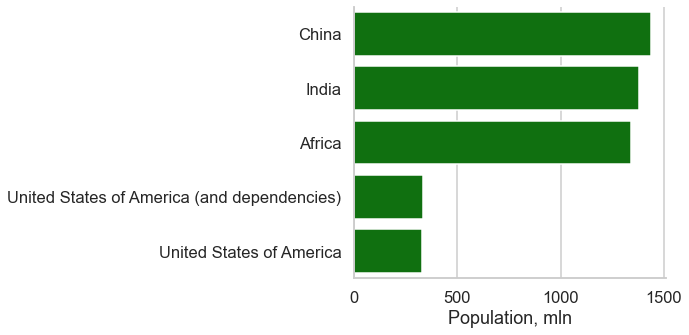

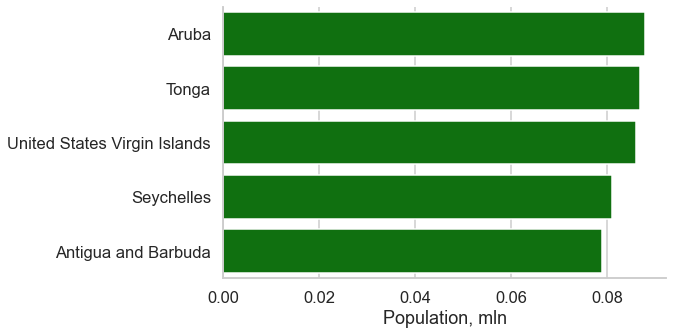

In [241]:
def Nlargest(N):
	"""
	Function that makes a bargraph of populations (in millions) of the N largest locations in the dataset
	"""
	df3 = df.groupby('Location', as_index=False)['PopTotalMln'].sum()
	df3.sort_values(by='PopTotalMln', inplace=True, ascending=False)
	df3 = df3[df3['Location'] != 'World']
	df3 = df3.head(N)
	bargraph = sns.catplot(
		x='PopTotalMln', y='Location', 
		data=df3, 
		kind='bar', color='green', orient='h', aspect=2
	)
	bargraph.set_axis_labels("Population, mln", "")

def Nsmallest(N):
	"""
	Function that makes a bargraph of populations (in millions) of the N smallest locations in the dataset
	"""
	df3 = df.groupby('Location', as_index=False)['PopTotalMln'].sum()
	df3.sort_values(by='PopTotalMln', inplace=True, ascending=False)
	df3 = df3[df3['Location'] != 'World']
	df3 = df3.tail(N)
	bargraph = sns.catplot(
		x='PopTotalMln', y='Location', 
		data=df3, 
		kind='bar', color='green', orient='h', aspect=2
	)
	bargraph.set_axis_labels("Population, mln", "")

Nlargest(5)
Nsmallest(5)

Which of the countries - UK, USA, Belgium, or Russia - has the largest population?

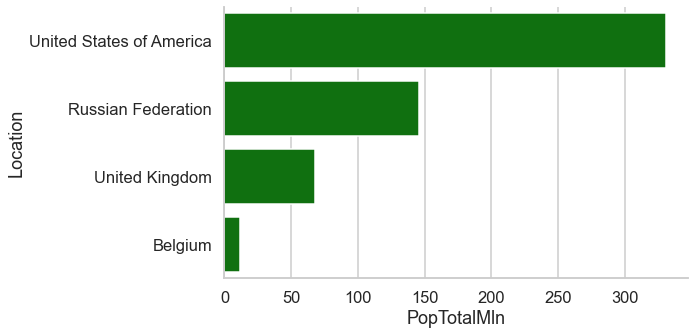

In [242]:
def bargraph_popByCountry2(countries:list):
	"""
	Given a list of countries as an argument, graph the bar graph of the ascending population size of those countries
	"""
	df2 = df.groupby('Location', as_index=False)['PopTotalMln'].sum()
	df2.sort_values(by='PopTotalMln', inplace=True, ascending=False)
	bargraph = sns.catplot(
		x='PopTotalMln', y='Location', 
		data=df2[df2['Location'].isin(countries)], 
		kind='bar', color='green', orient='h', aspect=2
	)

countryList = ['United Kingdom', 'United States of America', 'Belgium', 'Russian Federation']
bargraph_popByCountry2(countryList)

In the four countries - UK, USA, Belgium, and Russia - what is the distribution of population by age groups? 

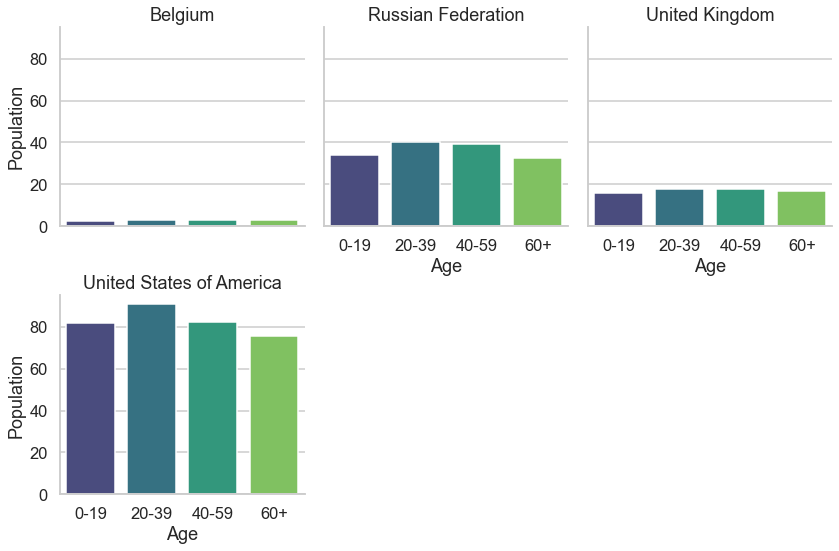

In [243]:
def bargraph_popByAge(countries:list):
	# plt.figure(figsize=(20, 10))
	bargraph = sns.catplot(
		x='AgeGrp', y='PopTotalMln',
		data=df[df['Location'].isin(countries)],
		col='Location', col_wrap=3, kind='bar', height=4, palette='viridis'
	)
	bargraph.set_titles("{col_name}")
	bargraph.set_axis_labels("Age", "Population")
	sns.set_style('whitegrid')
	sns.set_context('talk')

bargraph_popByAge(countryList)